# Import libs

In [20]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from libs.utils import rle_to_mask

# Configure paths

The "path_parent" should be "../severstal_steel_defect_detection"

In [2]:
path_parent = Path.cwd()
print(path_parent)

/home/thai/Desktop/Projects/severstal_steel_defect_detection


Paths point to folders holding training and tesing images

In [3]:
path_data_train = path_parent.joinpath("data/train_images")
path_data_test = path_parent.joinpath("data/test_images")

# Make some statistics on the dataset

In [4]:
n_images_train = len(list(path_data_train.glob("*.jpg")))
n_images_test = len(list(path_data_test.glob("*.jpg")))

print(f"There are {n_images_train} and {n_images_test} images in the training and test set respectively")

There are 12568 and 5506 images in the training and test set respectively


In [5]:
df_train_labels = pd.read_csv(path_parent.joinpath("data/train.csv"))
print(f"Shape of the 'df_train_labels': {df_train_labels.shape}")
print("")
print(f"Take a look at the label file:")
print(df_train_labels.head())
print("")
print(f"There are {df_train_labels.shape[0]} defects in the training set")

Shape of the 'df_train_labels': (7095, 3)

Take a look at the label file:
         ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...

There are 7095 defects in the training set


In [6]:
list_ids_images_defect = df_train_labels['ImageId'].unique()
print(f"The number of defect images in the training set: {len(list_ids_images_defect)}")

The number of defect images in the training set: 6666


It can be noticed that the number defect images is less than the number of defects. Hence, there are some images where there exit several defects.

In [7]:
df_train_labels_multiple_defects = pd.concat(g for _, g in df_train_labels.groupby('ImageId') if len(g) > 1)
df_train_labels_multiple_defects = df_train_labels_multiple_defects.reset_index()
df_train_labels_multiple_defects.head()

,index,ImageId,ClassId,EncodedPixels
0,5,0025bde0c.jpg,3,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...
1,6,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...
2,8,002fc4e19.jpg,1,146021 3 146275 10 146529 40 146783 46 147038 ...
3,9,002fc4e19.jpg,2,145658 7 145901 20 146144 33 146386 47 146629 ...
4,18,008ef3d74.jpg,1,356336 4 356587 11 356838 18 357089 25 357340 ...


In [8]:
list_ids_images_multiple_defects = df_train_labels_multiple_defects['ImageId'].unique()
print(f"There are {len(list_ids_images_multiple_defects)} images in which there are multiple defects")

There are 427 images in which there are multiple defects


# Visualize some images with their defects

EncodedPixels
- Masks are encoded using run-length encoding meaning that each pair of values that contain a start position and a run length (e.g., '1 3' implies starting at pixel 1 and running a total of 3 pixels (1,2,3))

- For example, '1 3 10 5' implies pixels 1, 2, 3, 10, 11, 12, 13, 14 are to be included in the mask.
- The pixels are numbered from top to bottom, then left to right: 1 is pixel (1,1), 2 is pixel (2,1), etc.


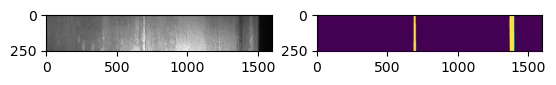

In [70]:
df_img_rand = df_train_labels.iloc[np.random.randint(len(df_train_labels))]
img_rand = cv2.imread(str(path_parent.joinpath("data/train_images", df_img_rand["ImageId"])))

img_rand_rle_mask = df_img_rand["EncodedPixels"]
img_rand_mask = rle_to_mask(img_rand_rle_mask, (img_rand.shape[0:2]))

plt.subplot(1, 2, 1)
plt.imshow(img_rand)

plt.subplot(1, 2, 2)
plt.imshow(img_rand_mask)

plt.show()